## Machine Learning Assignment 6
#### Section 1 Ji Hyun Kim

In [97]:
# Load Python Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
from sklearn.inspection import permutation_importance

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

from sklearn.preprocessing import StandardScaler

##### Load the data and drop 'Ticker Symbol’, ‘Period Ending’, ‘For Year'

In [98]:
# Import the dataset
df = pd.read_csv("fundamentals.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 79 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Unnamed: 0                                         1781 non-null   int64  
 1   Ticker Symbol                                      1781 non-null   object 
 2   Period Ending                                      1781 non-null   object 
 3   Accounts Payable                                   1781 non-null   float64
 4   Accounts Receivable                                1781 non-null   float64
 5   Add'l income/expense items                         1781 non-null   float64
 6   After Tax ROE                                      1781 non-null   float64
 7   Capital Expenditures                               1781 non-null   float64
 8   Capital Surplus                                    1781 non-null   float64
 9   Cash Rat

In [99]:
#drop Unnamed: 0, 'Ticker Symbol’, ‘Period Ending’, ‘For Year'
df = df.drop(['Unnamed: 0', 'Ticker Symbol', 'Period Ending', 'For Year'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 75 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Accounts Payable                                   1781 non-null   float64
 1   Accounts Receivable                                1781 non-null   float64
 2   Add'l income/expense items                         1781 non-null   float64
 3   After Tax ROE                                      1781 non-null   float64
 4   Capital Expenditures                               1781 non-null   float64
 5   Capital Surplus                                    1781 non-null   float64
 6   Cash Ratio                                         1482 non-null   float64
 7   Cash and Cash Equivalents                          1781 non-null   float64
 8   Changes in Inventories                             1781 non-null   float64
 9   Common S

##### Split data set with 70% train and 30% test then build random forest model.  Default every (hyper-)parameter then compute MSE. (15 pts)

In [100]:
# Remove NAs and check again

df=df.dropna()

df.info() # 1299 rows left

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1299 entries, 0 to 1779
Data columns (total 75 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Accounts Payable                                   1299 non-null   float64
 1   Accounts Receivable                                1299 non-null   float64
 2   Add'l income/expense items                         1299 non-null   float64
 3   After Tax ROE                                      1299 non-null   float64
 4   Capital Expenditures                               1299 non-null   float64
 5   Capital Surplus                                    1299 non-null   float64
 6   Cash Ratio                                         1299 non-null   float64
 7   Cash and Cash Equivalents                          1299 non-null   float64
 8   Changes in Inventories                             1299 non-null   float64
 9   Common S

In [101]:
# Define X and y variables and split the dataset into test and train set 
# y = Estimated Shares Outstanding     

X = df.drop('Estimated Shares Outstanding',axis=1)
y=df['Estimated Shares Outstanding']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                 test_size = 0.3,
                                                 random_state = 42)

In [102]:
# Initialize the RandomForestRegressor with every (hyper-)parameter set to default
rf_model = RandomForestRegressor(random_state=42) # Outcome variable is not binary values, hence Regressor

# Fit the model on the training set 
rf_model.fit(X_train, y_train)

# Predict with the testing set 
y_pred = rf_model.predict(X_test)

# Compute MSE 
mse = mean_squared_error(y_test, y_pred)

print(f"MSE of RF model: {mse}")

MSE of RF model: 8.483705826469883e+16


##### Build random forest with min_samples_split set to 3.  Compare with random forest model in (b).  Explain. (15 pts)

In [103]:
# Initialize the RandomForestRegressor with min_samples_split set to 3
rf_model2 = RandomForestRegressor(min_samples_split= 3, random_state=42) # Outcome variable is not binary values, hence Regressor

# Fit the model on the training set 
rf_model2.fit(X_train, y_train)

# Predict with the testing set 
y_pred = rf_model2.predict(X_test)

# Compute MSE 
mse = mean_squared_error(y_test, y_pred)

print(f"MSE of RF model: {mse}")

MSE of RF model: 8.499075852582971e+16


**Interpretation**

- The MSEs for both models are quite large, indicating a very high error in the predictions. 
- The MSE of RF model with min_samples_split = 3 is greater than that of the default model. It suggests that this specific hyperparameter tuning did not improve the model's predictive performance for the test data.


##### Use "Mean Decrease in Impurity" and "Permutation Feature Importance" to compute the variable importance of the random forest in (c).  Explain how each method computes the variable importance and compare their results. (15 pts)

                                                   Importance
Total Equity                                         0.193457
Total Liabilities & Equity                           0.150550
Total Assets                                         0.136792
Earnings Before Interest and Tax                     0.071812
Net Cash Flow-Operating                              0.054852
Earnings Per Share                                   0.043453
Net Income-Cont. Operations                          0.035188
Other Equity                                         0.024946
Operating Income                                     0.023814
Gross Margin                                         0.013680
Gross Profit                                         0.013103
Other Assets                                         0.012986
Other Current Liabilities                            0.012825
Net Income Applicable to Common Shareholders         0.012439
Capital Surplus                                      0.010981
Deferred

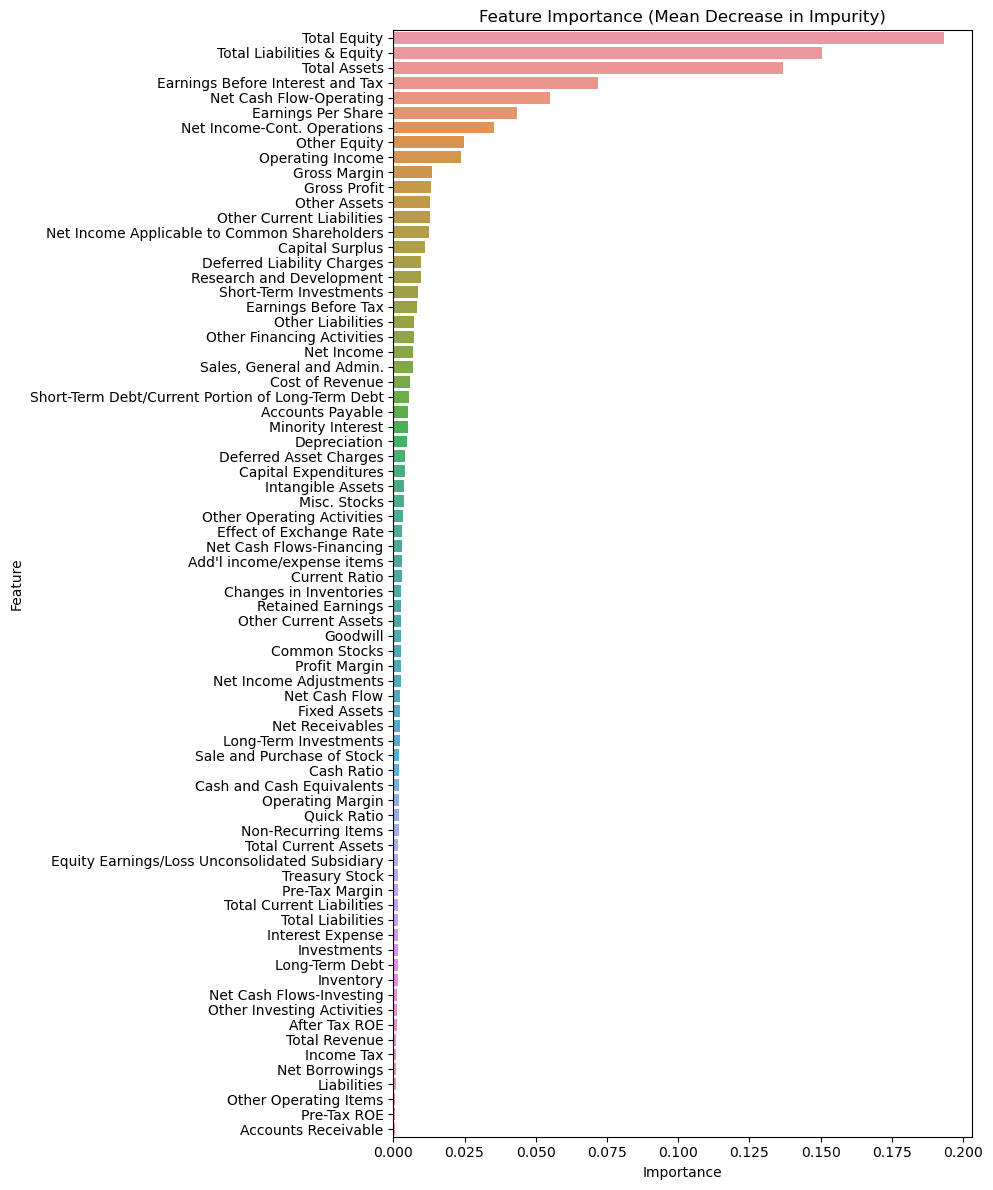

In [104]:
# Get feature importances of all features in the second model, using the mean decrease in impurity
# feature_importances_ feature of sklearn directly calculate these importances
feature_importances_mdi = rf_model2.feature_importances_ 

# Print the importances, in descending order
feature_names = X.columns
feature_importances_mdi_f = pd.DataFrame(feature_importances_mdi, index=feature_names, columns=["Importance"]).sort_values("Importance", ascending=False)

pd.set_option('display.max_rows', None)
print(feature_importances_mdi_f)
pd.reset_option('display.max_rows')

# visualize with bar plot
# Reset the indice
feature_importances_mdi_f_reset = feature_importances_mdi_f.reset_index()
feature_importances_mdi_f_reset.columns = ['Feature', 'Importance']

# plot a bar plot
plt.figure(figsize=(10, 12))
sns.barplot(x='Importance', y='Feature',  data=feature_importances_mdi_f_reset, orient='h')
plt.title('Feature Importance (Mean Decrease in Impurity)')
plt.tight_layout() 
plt.show()

                                                   Importance Mean
Total Equity                                              0.121274
Total Liabilities & Equity                                0.102612
Total Assets                                              0.080333
Earnings Per Share                                        0.077449
Other Equity                                              0.052094
Net Cash Flow-Operating                                   0.024664
Earnings Before Interest and Tax                          0.022059
Other Current Liabilities                                 0.015201
Net Income Applicable to Common Shareholders              0.013951
Net Income-Cont. Operations                               0.010854
Gross Profit                                              0.010312
Gross Margin                                              0.008537
Cost of Revenue                                           0.008392
Short-Term Investments                                    0.00

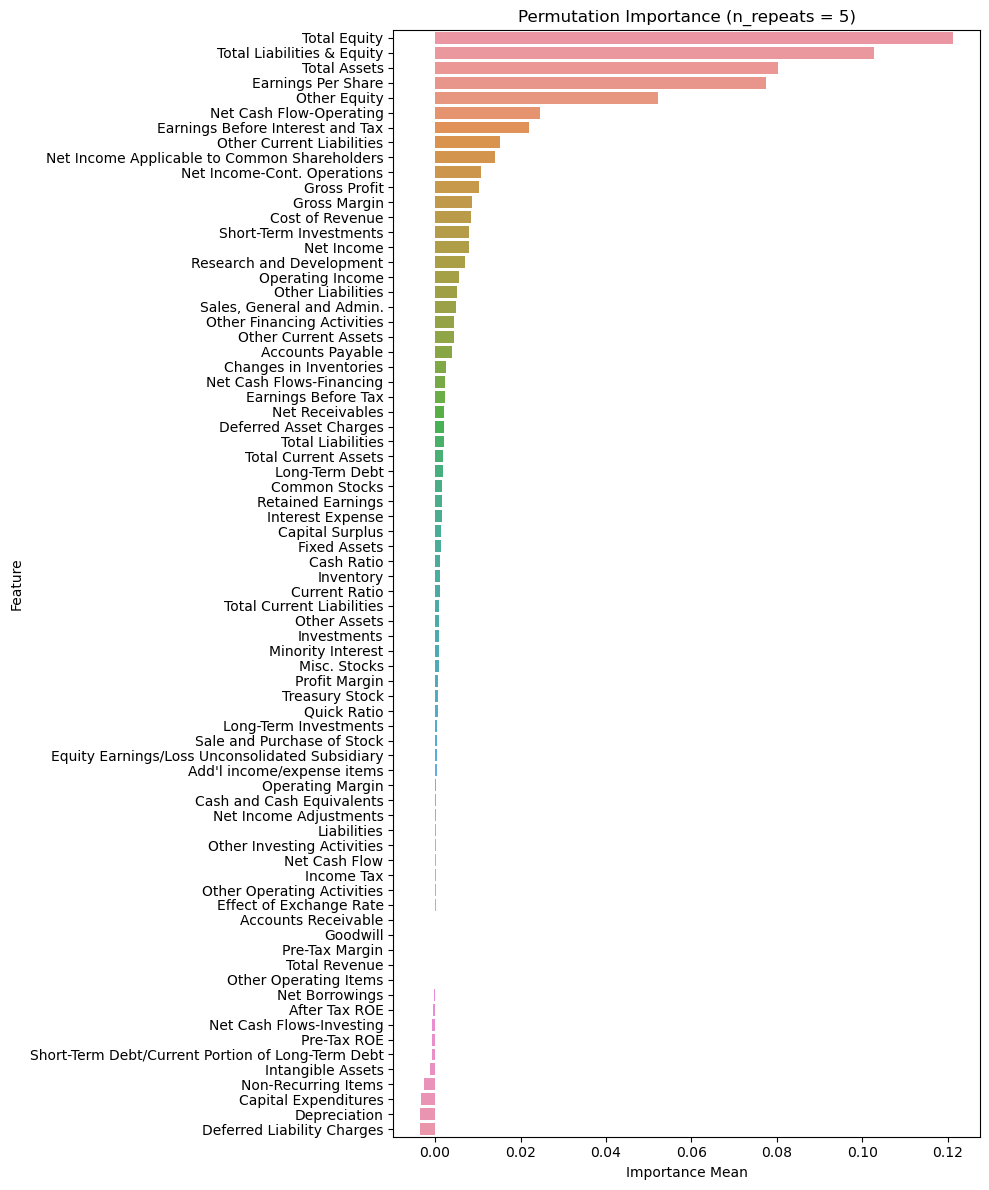

In [105]:
# Now get permutation importances of all features in the second model
# permutaion_importance feature in sklearn does the job
feature_importances_permute = permutation_importance(rf_model2, X_test, y_test, random_state=42)
#n_repeats is set to 5 

# Print the importances, in descending order
feature_names = X.columns
feature_importances_permute_f = pd.DataFrame({
    'Importance Mean': feature_importances_permute.importances_mean
}, index=feature_names).sort_values(by='Importance Mean', ascending=False)

pd.set_option('display.max_rows', None)
print(feature_importances_permute_f)
pd.reset_option('display.max_rows')

# visualize with bar plot
# Reset the indice
feature_importances_permute_f_reset = feature_importances_permute_f.reset_index()
feature_importances_permute_f_reset.columns = ['Feature', 'Importance Mean']

# plot a bar plot
plt.figure(figsize=(10, 12))
sns.barplot(x='Importance Mean', y='Feature',  data=feature_importances_permute_f_reset, orient='h')
plt.title('Permutation Importance (n_repeats = 5)')
plt.tight_layout() 
plt.show()

**Compare the results**

- For both cases, Total Equity, Total Liabilities & Equity, Total Assets are 3 most important features. 
- However, the importances has been decreased in permutation feature importances, which suggest that the features have a strong impact on the model's ability to make accurate splits, but when actually repeated, they do not impact the model's performance as much. 
- In addition, in permutation feature importance, there're several features that have negative values. These negative values indicate that the predictions on the shuffled (or noisy) data are more accurate than the real data. This means that the feature does not contribute much to predictions, but random chance caused the predictions on shuffled data to be more accurate.

##### Use the same split to build lasso regression.  Compare with last model (c). (15 pts)

In [106]:
# Scale the features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Lasso Linear model
lasso_model = LassoCV(max_iter= 10000, cv = 5, random_state=42) 

# Fit the model on the training set 
lasso_model.fit(X_train_scaled, y_train)

# Predict with the testing set 
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Compute MSE 
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print(f"MSE of Lasso Regression model: {mse_lasso}")

MSE of Lasso Regression model: 1.2305666608362182e+17


In [107]:
# Extract the coefficients of the lasso model to get the feature importance
lasso_coefficients = lasso_model.coef_

# Create a DataFrame of feature importances
lasso_feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': lasso_coefficients
})

# Sort by the absolute value of the coefficient
lasso_feature_importances['Importance'] = lasso_feature_importances['Importance'].abs()
lasso_feature_importances = lasso_feature_importances.sort_values(by='Importance', ascending=False)

# Display the feature importances
pd.set_option('display.max_rows', None)
print(lasso_feature_importances)
pd.reset_option('display.max_rows')


                                              Feature    Importance
64                             Short-Term Investments  2.818061e+08
5                                     Capital Surplus  2.436273e+08
38                                         Net Income  2.304931e+08
73                                 Earnings Per Share  1.371922e+08
68                                       Total Equity  1.355966e+08
63  Short-Term Debt/Current Portion of Long-Term Debt  1.251557e+08
59                           Research and Development  1.217759e+08
36                           Net Cash Flows-Financing  1.109843e+08
27                                        Investments  7.540282e+07
46                                       Other Assets  6.798369e+07
30                              Long-Term Investments  5.054638e+07
62                          Sales, General and Admin.  3.715613e+07
32                                       Misc. Stocks  3.039402e+07
0                                    Accounts Pa

**Random Forest(min_samples_split = 3) vs LASSO Regression(CV = 5)**

- MSE of RF model is 8.499075852582971e+16 and MSE of LASSO Regression is 1.2305666608362182e+17. This indicates that the RF model has a lower error on the test data compared to the Lasso Regression model, suggesting RF model is better fit for this data. With that said, the MSEs are very high for both models.

- In terms of feature importance in a Lasso Regression model, we can examine the absolute values of the coefficients of each feature. Short-Term Investments, Capital Surplus, and Net Income are the top three features of the model. These features are not as important in the Random Forest model.

##### Decision Tree Classification : Use the breast cancer dataset to build decision tree classifier to predict the diagnosis.  Split the data into 70% train and 30% test. (10 pts)

In [108]:
# Import the dataset
df2 = pd.read_csv("Cancer.csv")

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [109]:
# Remove any unnamed columns
df2 = df2.loc[:, ~df2.columns.str.contains('^Unnamed')]

# Remove id
df2 = df2.iloc[:,1:]

# Check again
df2.info() # Unnamed column is dropped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [110]:
# Define X and y variables and split the dataset into test and train set 
# y = Estimated Shares Outstanding     

X = df2.drop('diagnosis',axis=1)
y=df2['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                 test_size = 0.3,
                                                 random_state = 42)

In [111]:
# Initialize the DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training set 
tree_model.fit(X_train, y_train)

# Predict with the testing set 
y_pred = tree_model.predict(X_test)

##### Print Confusion matrix and explain. (10 pts)

Confusion Matrix :
 [[101   7]
 [  3  60]]


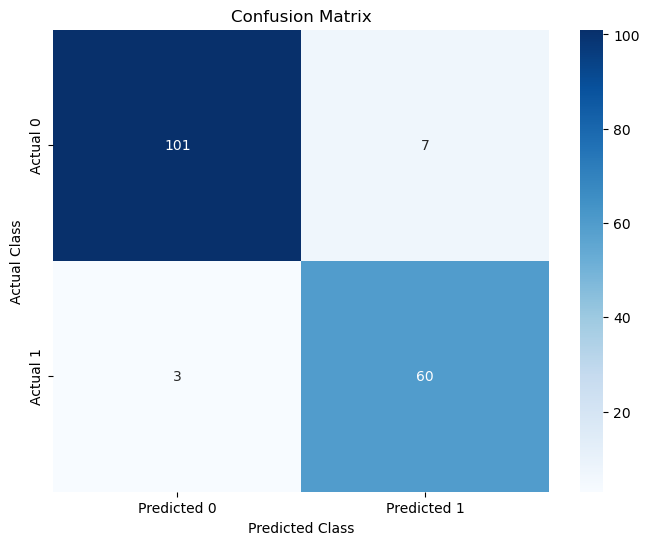

In [112]:
# Evaluate the model with confusion matrix 
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the result
print("Confusion Matrix :\n", conf_matrix)

# Visualize
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

In [113]:
# Evaluate the model with accuracy
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the result
print("Accuracy of the DT model:", accuracy)
print("Classification Report:\n", class_report)

Accuracy of the DT model: 0.9415204678362573
Classification Report:
               precision    recall  f1-score   support

           B       0.97      0.94      0.95       108
           M       0.90      0.95      0.92        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



**Interpretation**

- True Negatives = The number of cases where the actual class was 0 and the model also predicted 0 is 101.
- True Positives = The number of cases where the actual class was 1 and the model also predicted 1 is 60.
- False Positives = The number of cases where  the actual class was 0 but the model incorrectly predicted 1 is 7.
- False Negatives = The number of cases where the actual class was 1 but the model incorrectly predicted 0 is 3.

- Accuracy = (TP+TN)/(TP+TN+FP+FN) = 0.94 

Overall, the DT model has a high number of TN and TP, suggesting it can accurately identify both classes and the low number of FP and FN indicates that the model makes few errors when predicting.

##### Visualize the tree.  What variables are in the plot? (10 pts)

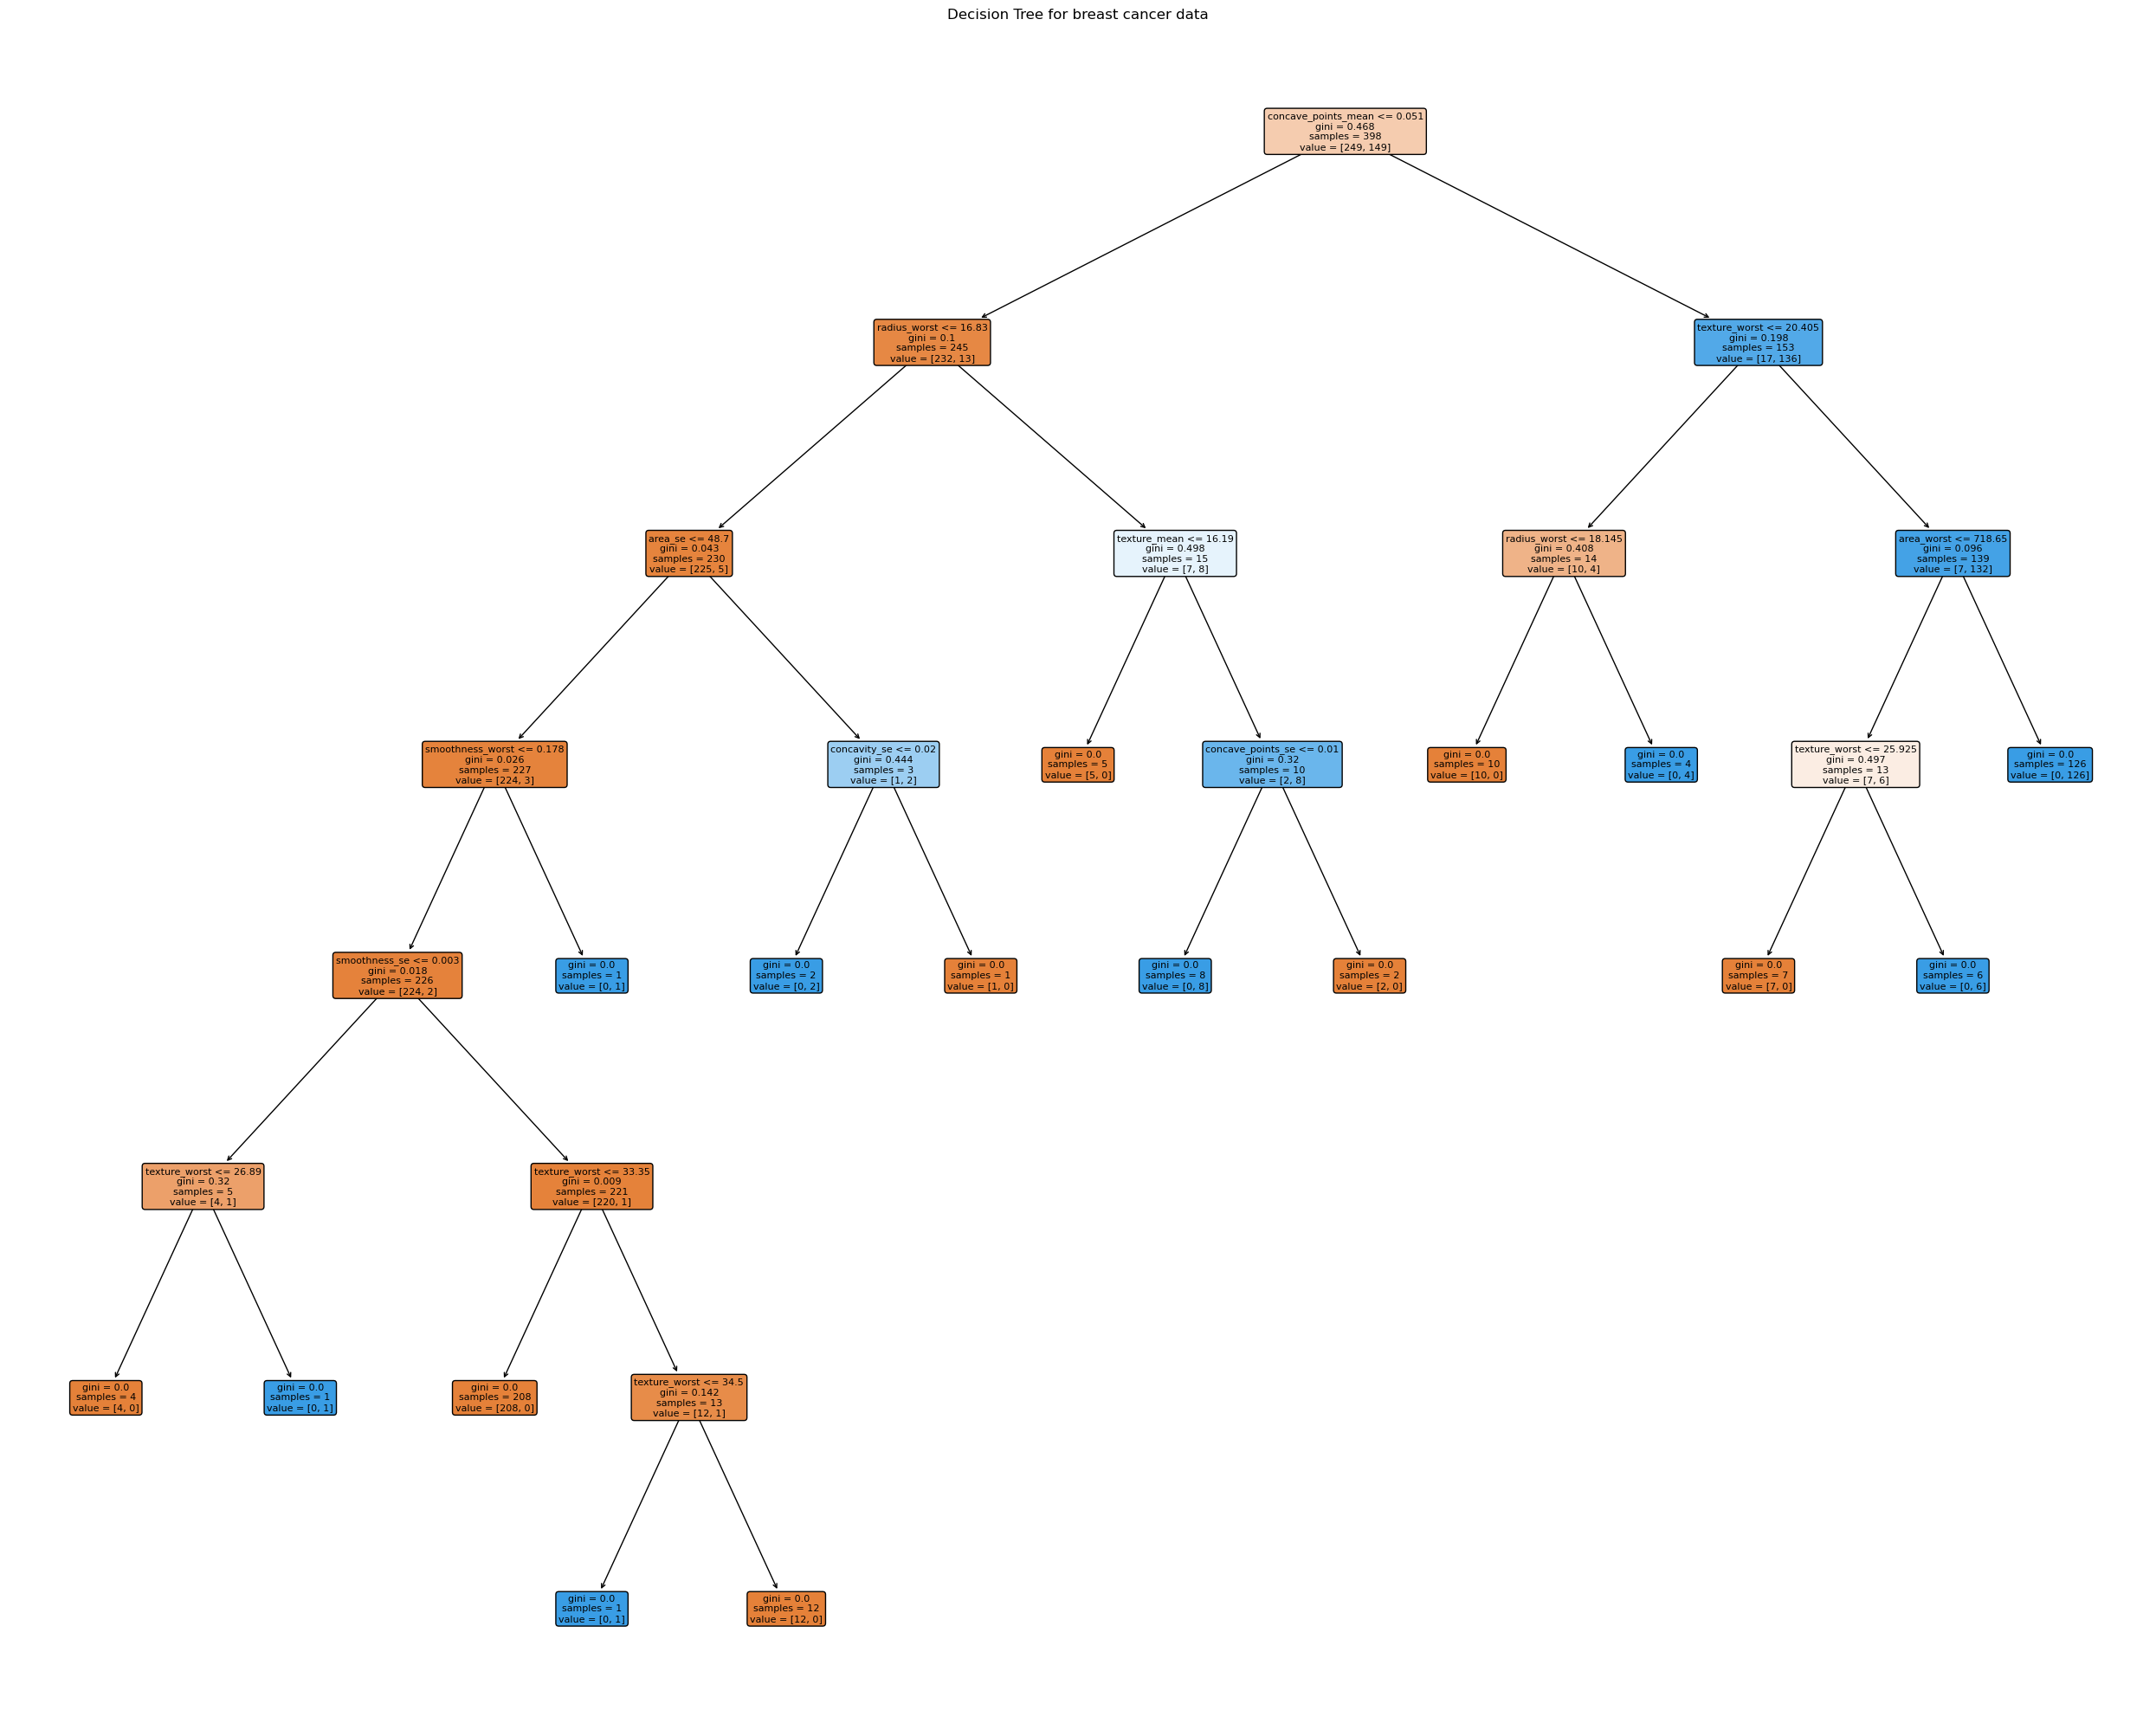

In [114]:
# Plot the decision tree
plt.figure(figsize=(25, 20))
feature_names_list = X_train.columns.tolist()

plot_tree(tree_model, filled=True, feature_names=feature_names_list, rounded=True, fontsize=8)
plt.title("Decision Tree for breast cancer data")

# Display the plots
plt.tight_layout()
plt.show()

We can observe the features as follows:

- concave_points_mean
- radius_worst
- area_se
- texture_mean
- smoothness_worst 
- concavity_se
- smoothness_se
- texture_worst
- concave_points_se
- area_worst



##### No code required:  would you consider pruning this tree?  Why?  Where?  Explain how you would go about deciding where to prune the tree?  What measures would you use? (10 pts)

Yes, this tree model requires pruning to address the issue of overfitting. Upon examining the tree plot, we can observe that certain leaf nodes, such as the one where `texture_worst <= 34.5`, contain very few samples(only one!). This is a clear indication of overfitting, and such leaves need to be pruned by adjusting the number of samples through hyperparameter tuning (`min_samples_leaf`, `min_samples_split`). 

The `min_samples_leaf` hyperparameter specifies the minimum number of samples that must be present at a leaf node. Similarly, `min_samples_split` is another hyperparameter that determines the minimum number of samples required to split an internal node. Increasing these numbers can prevent the model from learning noise in the training data, which often leads to overfitting. 

For the measures, I would continue using the Gini index to assess the impurity of the classification, as in the current model. However, if we were to run GridSearchCV to find the optimal parameters, it might suggest an alternative, such as Entropy, to measure the information gain.